In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:

def create_radar_chart(ax, angles, values, labels, color='blue', alpha=0.25, 
                      label=None, zorder=1):
    """Create a radar chart with custom styling"""
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label=label, zorder=zorder)
    ax.fill(angles, values, color=color, alpha=alpha, zorder=zorder)

def plot_single_comparison(person1, person2, preferences):
    """Create a styled radar chart comparing two people's preferences"""
    try:
        roles = list(preferences[person1].keys())
        num_vars = len(roles)
        
        # Calculate angles for each role
        angles = np.linspace(0, 2 * np.pi, len(roles), endpoint=False)
        
        fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
        
        # Styling
        fig.patch.set_facecolor('#E5F9E0')
        ax.set_facecolor('#E5F9E0')
        ax.grid(True, color='gray', alpha=0.2)
        ax.set_ylim(0, 5)
        ax.set_yticklabels([])
        
        # Add grid circles and labels
        gridlines = np.arange(1, 6)
        for tick in gridlines:
            circle = plt.Circle((0, 0), tick, fill=False, color='gray', 
                              alpha=0.1, linestyle='-', zorder=1)
            ax.add_artist(circle)
            if tick < 5:
                ax.text(-0.2, tick, str(tick), ha='right', va='center', color='gray')
        
        # Plot data
        values1 = [preferences[person1][role] for role in roles]
        values2 = [preferences[person2][role] for role in roles]
        
        create_radar_chart(ax, angles, values1, roles, '#2DD4BF', 0.3, person1, zorder=2)
        create_radar_chart(ax, angles, values2, roles, '#FF6B6B', 0.3, person2, zorder=2)
        
        # Set the labels at the correct angles
        ax.set_xticks(angles)
        ax.set_xticklabels(roles)
        
        # Rotate the labels for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        
        # Adjust legend position and title
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title(f'Role Preferences Comparison:\n{person1} vs {person2}', pad=20, color='black')
        
        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        
        return fig
    except Exception as e:
        print(f"Error in plot_single_comparison: {str(e)}")
        return None

def get_role_preferences(df):
    """Extract and clean role preferences"""
    role_columns = [
        'Cinematographer', 'Art Direction', 'World Builder', '3D modeler',
        'Movement Director', 'Performer', 'Interaction Designer', 'Programmer',
        'Character Designer', 'Lighting Designer'
    ]
    
    preferences = {}
    for _, row in df.iterrows():
        name = row["What's your name?"].strip()
        preferences[name] = {}
        for role in role_columns:
            role_col = [col for col in df.columns if role in col][0]
            value = row[role_col]
            # Extract first number from string
            number = ''.join(filter(str.isdigit, str(value)))
            preferences[name][role] = int(number[0]) if number else 0
            
    return preferences

def get_all_comparisons(your_name, file_path='data/Role preference (Responses).csv'):
    """Get a list of all possible comparison pairs with your name"""
    try:
        df = pd.read_csv(file_path)
        preferences = get_role_preferences(df)
        
        if your_name not in preferences:
            print(f"Name not found. Available names are: {list(preferences.keys())}")
            return None, None
        
        others = [name for name in preferences.keys() if name != your_name]
        return others, preferences
    except Exception as e:
        print(f"Error in get_all_comparisons: {str(e)}")
        return None, None

def show_comparison(your_name, other_name, preferences):
    """Show a single comparison between your_name and other_name"""
    try:
        fig = plot_single_comparison(your_name, other_name, preferences)
        if fig is not None:
            plt.show()
            plt.close(fig)
    except Exception as e:
        print(f"Error in show_comparison: {str(e)}")

def interactive_comparisons(your_name):
    others, preferences = get_all_comparisons(your_name)
    if others is None:
        return
    
    print(f"\nAvailable comparisons for {your_name}:")
    for i, name in enumerate(others, 1):
        print(f"{i}. {name}")
    
    while True:
        try:
            choice = input("\nEnter the number of the person to compare with (or 'q' to quit): ")
            if choice.lower() == 'q':
                break
            
            idx = int(choice) - 1
            if 0 <= idx < len(others):
                show_comparison(your_name, others[idx], preferences)
            else:
                print("Invalid number. Please try again.")
        except ValueError:
            print("Please enter a valid number or 'q' to quit.")


Available comparisons for Ferg:
1. Yawen
2. Soe-Myat
3. ben
4. Beichennnn
5. Jiya Zhang
6. Bami
7. Tinu
8. Olly
9. Ziyan
10. Lan
11. Homan
12. Zade
13. Proud
14. Alyasi
15. Charlotte



Enter the number of the person to compare with (or 'q' to quit):  1


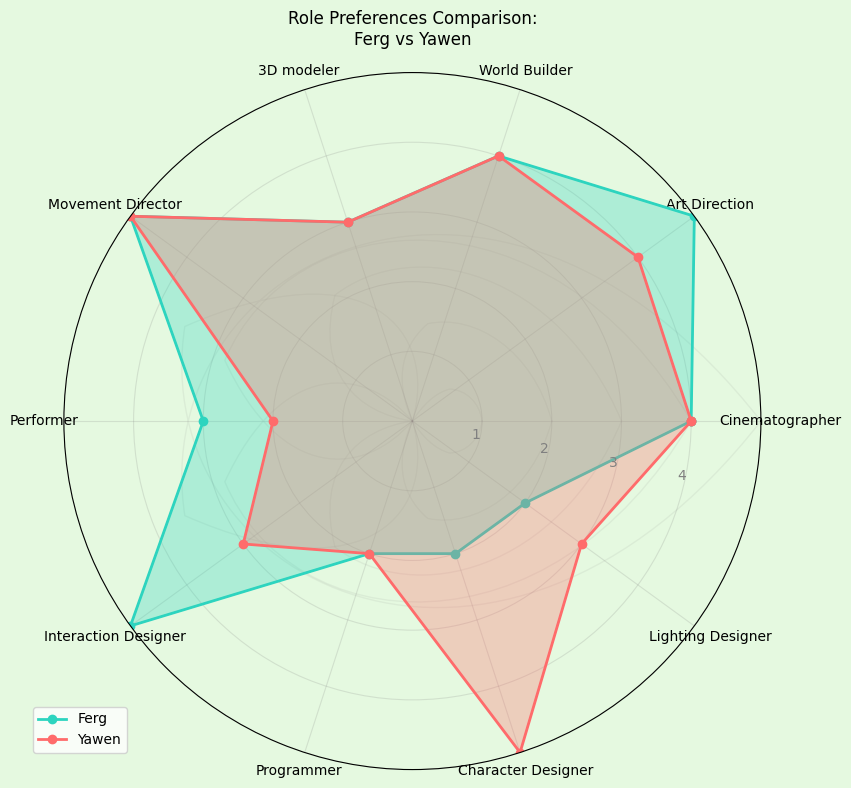


Enter the number of the person to compare with (or 'q' to quit):  2


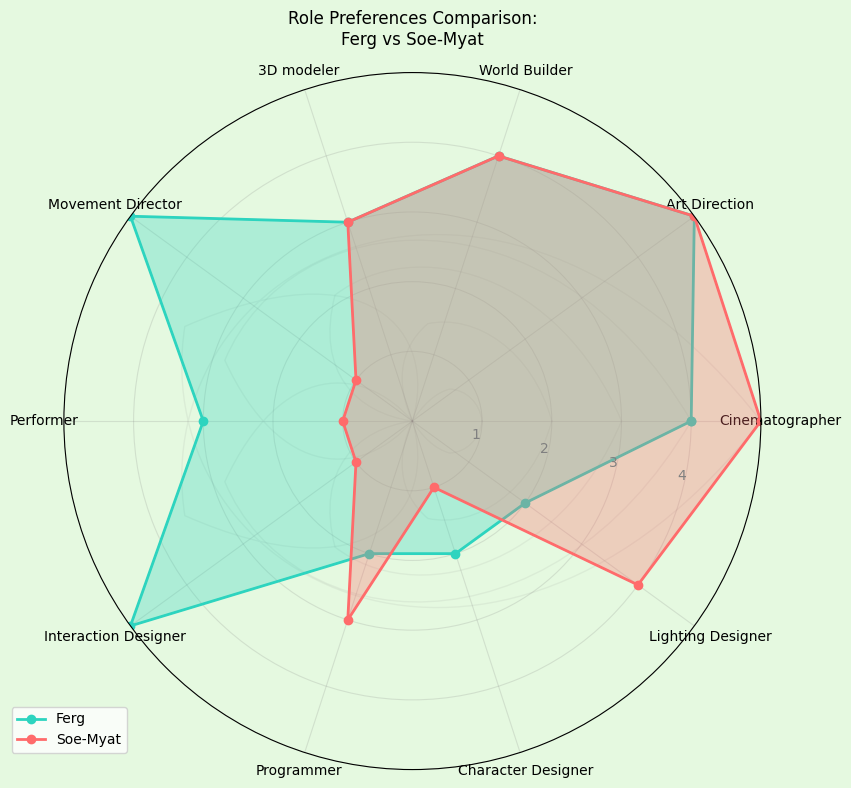


Enter the number of the person to compare with (or 'q' to quit):  3


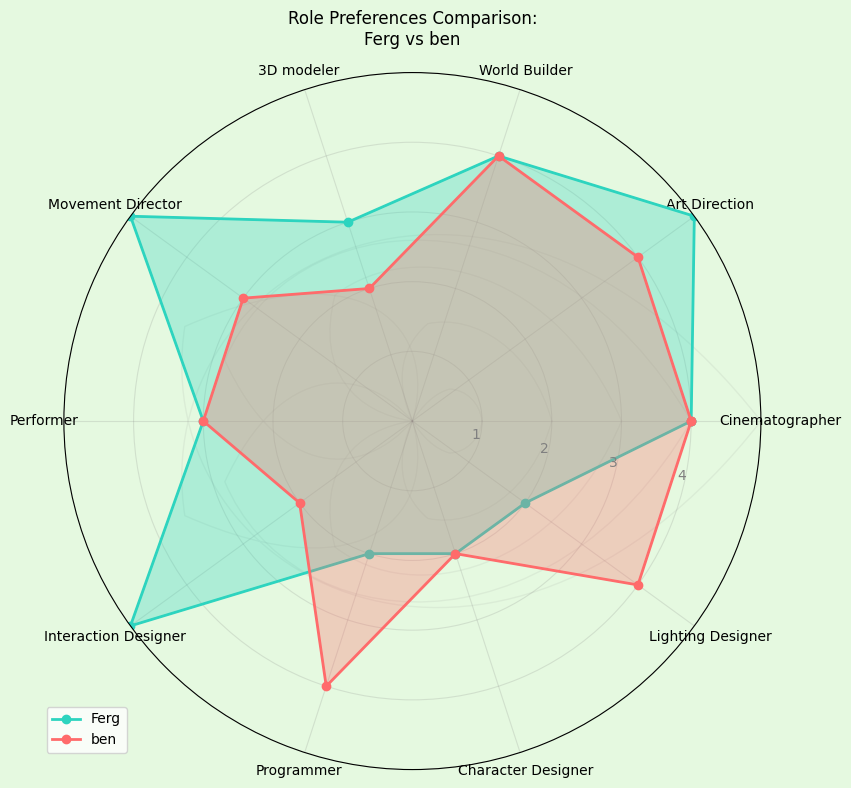

In [ ]:
# Start the interactive comparison tool
interactive_comparisons("Ferg")